Plot logical error rate against combined (fusion error and erasure) noise rate for BB code lattices, i.e., sweeps of constant polar angle in combined noise phase space. Get pseudo-threshold for each sweep.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

#### Choose angle $\theta$ to load data:

In [29]:
# Folder containing the text files
folder_path = "bb_data_20points/angle 1.0"
angle = 1.0
theta = angle * np.pi/2


n72_data = []
n90_data = []
n108_data = []
n144_data = []

# Get all text files in the folder
files = sorted(f for f in os.listdir(folder_path) if f.endswith(".txt"))

for file in files:
    file_path = os.path.join(folder_path, file)
    data = np.loadtxt(file_path).astype(int)  
    if len(data) >= 4:  # Ensure there are at least 4 values
        n72_data.append(data[0])
        n90_data.append(data[1])
        n108_data.append(data[2])
        n144_data.append(data[3])


tot_num_trials = 100000
n72_err_rate = [sum(elements)/tot_num_trials for elements in zip(*n72_data)]
n90_err_rate = [sum(elements)/tot_num_trials for elements in zip(*n90_data)]
n108_err_rate = [sum(elements)/tot_num_trials for elements in zip(*n108_data)]
n144_err_rate = [sum(elements)/tot_num_trials for elements in zip(*n144_data)]


l_err_rates = np.array([n72_err_rate,n90_err_rate,n108_err_rate,n144_err_rate])

C:\Users\wg22320\AppData\Local\Temp\ipykernel_30372\1559590480.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


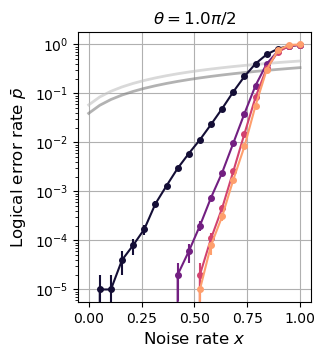

In [30]:
n_list = [72,90,108,144]
k_list = [12,8,8,12]
d_codes = [6,10,10,12]

min_err, max_err = 0.00005, 0.003 # these are fixed from simulations
min_loss, max_loss = 0.01, 0.1

fig2, ax2 = plt.subplots(figsize=(3, 3.5))
e_0 = (max_err - min_err) * np.cos(theta)
l_0 = (max_loss - min_loss) * np.sin(theta)
x = np.linspace(0,1,20)

def normalised_noise_curve(x, k):
    p = x*((1-l_0)*e_0+0.5*l_0) + (min_err * np.cos(theta)) +  (0.5*min_loss * np.sin(theta)) 
    return 1-(1-p)**k

plt.plot(x,normalised_noise_curve(x,8),color="grey", label=r"$k=8$",alpha=0.6, lw=2) # logical = physical error line
plt.plot(x,normalised_noise_curve(x,12),color="silver", label=r"$k=12$",alpha=0.6, lw=2) # logical = physical error line

import matplotlib.cm as cm

cmap = cm.get_cmap('magma')
colors_list = [cmap(i) for i in np.linspace(0.1, 0.8, 4)] 

for i in range(len(d_codes)):
    # Compute standard errors for all points in p_list
    std_err = np.sqrt(l_err_rates[i] * (1 - l_err_rates[i]) / tot_num_trials)
    
    # Plot with error bars
    ax2.errorbar(x, l_err_rates[i],yerr=std_err, fmt='o-', 
                 ms=4, lw=1.5,label=f"[[{n_list[i]}, {k_list[i]}, {d_codes[i]}]]",color=colors_list[i])
    
ax2.set_yscale('log')

plt.title(rf"$\theta = {angle} \pi/2$")
ax2.set_xlabel(r'Noise rate $x$',fontsize=12)
ax2.set_ylabel(r'Logical error rate $\bar{p}$',fontsize=12)
plt.grid()
# plt.legend(bbox_to_anchor=(-0.4,0.8),borderpad=1.1,fontsize=10)
# plt.savefig(f"angle_{angle}_ler.png",bbox_inches='tight', dpi=200)

Error and erasure only plots:

C:\Users\wg22320\AppData\Local\Temp\ipykernel_41096\146053531.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('magma')


Color 1: #140e36
Color 2: #721f81
Color 3: #d2426f
Color 4: #fe9f6d


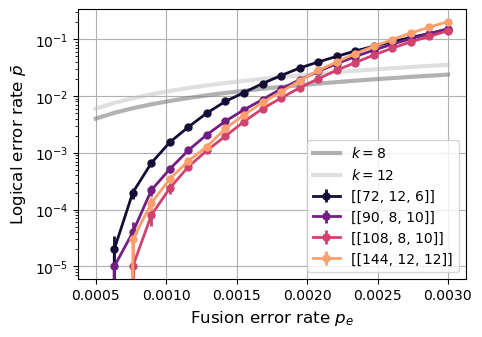

In [23]:
n_list = [72,90,108,144]
k_list = [12,8,8,12]
d_codes = [6,10,10,12]

min_err, max_err = 0.0005, 0.003 
# min_loss, max_loss = 0.01, 0.1

fig2, ax2 = plt.subplots(figsize=(5, 3.5))
e_0 = (max_err - min_err) * np.cos(theta)
l_0 = (max_loss - min_loss) * np.sin(theta)
x = np.linspace(min_err, max_err,20) 
# x = np.linspace(min_loss, max_loss,20) 
x1 = np.linspace(0,1,20)


def normalised_noise_curve(x, k):
    p = x*((1-l_0)*e_0+0.5*l_0) + (min_err * np.cos(theta)) +  (0.5*min_loss * np.sin(theta)) 
    return 1-(1-p)**k


import matplotlib.cm as cm
plt.plot(x,normalised_noise_curve(x1,8),color="grey", label=r"$k=8$",alpha=0.6, lw=3) # logical = physical error line
plt.plot(x,normalised_noise_curve(x1,12),color="silver", label=r"$k=12$",alpha=0.5,lw=3) # logical = physical error line
cmap = cm.get_cmap('magma')
colors_list = [cmap(i) for i in np.linspace(0.1, 0.8, 4)] 
    
for i in range(len(d_codes)):
    std_err = np.sqrt(l_err_rates[i] * (1 - l_err_rates[i]) / tot_num_trials)
    ax2.errorbar(x, l_err_rates[i],yerr=std_err, fmt='o-',ms=5, lw=2,
                 label=f"[[{n_list[i]}, {k_list[i]}, {d_codes[i]}]]",color=colors_list[i]) 
ax2.set_yscale('log') 

ax2.set_xlabel(r'Fusion error rate $p_e$',size=12)
ax2.set_ylabel(r'Logical error rate $\bar{p}$',size=12)
ax2.tick_params(axis='both', which='major', labelsize=10)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1.02))
plt.legend(loc="lower right")
# plt.savefig("bb_error_only_EB.png",bbox_inches='tight', dpi=200)

Find pseudo-thresholds through interpolation:

In [82]:
from scipy.interpolate import interp1d
from scipy.optimize import fsolve

def pseudo_threshold_estimate_interpolation(p_list, curve_data, initial_guess):
    # interpolate the data curve
    f = interp1d(p_list, curve_data, kind = "cubic") 
    def normalised_noise_curve(x, k):
        p = x*((1-l_0)*e_0+0.5*l_0) + (min_err * np.cos(theta)) +  (0.5*min_loss * np.sin(theta)) 
        return 1-(1-p)**k
    def find_intersection(x):
        return f(x)- normalised_noise_curve(x,8) # this is the logical error = physical error curve, ADJUST K HERE
    intersection = fsolve(find_intersection, x0=initial_guess)[0] 
    return intersection, f(intersection)

In [84]:
print(pseudo_threshold_estimate_interpolation(x, l_err_rates[2], 0.8))

(0.837238685829795, array(0.2945398))


In [2]:
# get pseudo-thresholds from above
pt_72 = [0.483,0.374,0.287,0.241,0.212,0.202,0.200,0.211,0.243,0.366,0.786]
pt_90 = [0.519,0.344,0.255,0.201,0.173,0.159,0.151,0.155,0.170,0.211,0.823]
pt_108 = [0.579,0.377,0.270,0.215,0.182,0.164,0.155,0.155,0.169,0.206,0.837]
pt_144 = [0.597,0.391,0.280,0.222,0.188,0.168,0.159,0.159,0.170,0.203,0.855]

In [3]:
# given noise rate, what is the corresponding p_err and p_erase?

min_err, max_err = 0.00005, 0.003 # these have been fixed from simulations
min_loss, max_loss = 0.01, 0.1

def get_err_and_erase(x,angle):
    theta = angle*np.pi/2
    p_err = (x*(max_err-min_err)+min_err)*np.cos(theta)
    p_erase = (x*(max_loss-min_loss)+min_loss)*np.sin(theta)
    return p_err, p_erase

angles = np.arange(0, 1.1, 0.1)
pt_noise_72 = []
pt_noise_90 = []
pt_noise_108 = []
pt_noise_144 = []
for i in range(len(pt_72)):
    pt_noise_72.append(get_err_and_erase(pt_72[i],angles[i]))
    pt_noise_90.append(get_err_and_erase(pt_90[i],angles[i]))
    pt_noise_108.append(get_err_and_erase(pt_108[i],angles[i]))
    pt_noise_144.append(get_err_and_erase(pt_144[i],angles[i]))

pt_noise = [pt_noise_72,pt_noise_90,pt_noise_108,pt_noise_144]

Text(0.5, 1.0, 'Pseudo-thresholds')

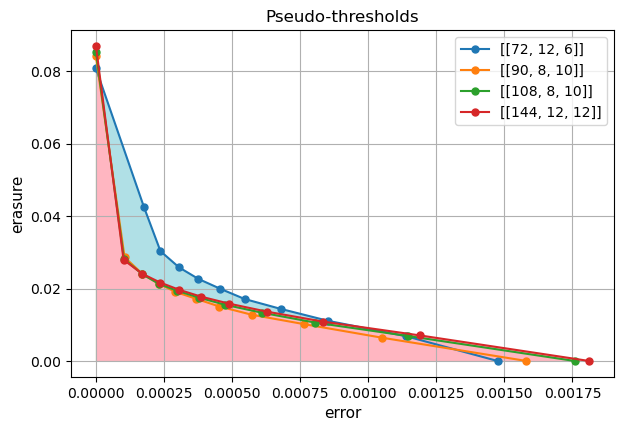

In [99]:
colors = ["powderblue","moccasin","lightgreen","lightpink"]
plt.figure(figsize=(7, 4.5))
for i in range(len(d_codes)):
    x, y = zip(*pt_noise[i])
    plt.plot(x,y,marker="o", label=f"[[{n_list[i]}, {k_list[i]}, {d_codes[i]}]]", ms=5, lw=1.5)
    plt.fill_between(x, y, 0, facecolor=colors[i], interpolate=True)


plt.legend()
plt.grid()
plt.xlabel("error", size=11)
plt.ylabel("erasure", size=11)
plt.title("Pseudo-thresholds")